# LOADING DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('iris(1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# DATA PREPROCESSING

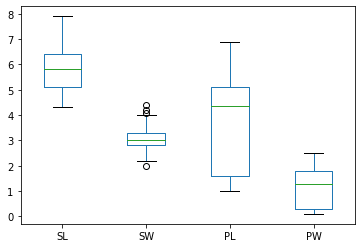

In [7]:
#check for outliers
data.boxplot(grid=False)
plt.show()

In [8]:
#outliers are present in sepal width, so we fill it using median, others wIth either  mean or ffill or bfill
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].bfill())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

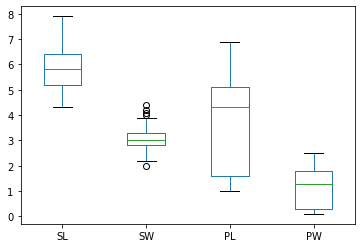

In [10]:
#check for outliers
data.boxplot(grid=False)
plt.show()

In [11]:
#clearing the outliers by finding Inter quartile range
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)

Q1= 2.8
Q2= 3.0
Q3= 3.25


In [12]:
IQR=Q3-Q1
print('IQR=',IQR)

IQR= 0.4500000000000002


In [13]:
low_lim= Q1-1.5*IQR
up_lim= Q3+1.5*IQR
print('Lower limit=',low_lim)
print('Upper limit=',up_lim)

Lower limit= 2.1249999999999996
Upper limit= 3.9250000000000003


In [14]:
outlier=[]
for x in data['SW']:
    if((x<low_lim)or(x>up_lim)):
        outlier.append(x)

In [15]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [16]:
ind=data['SW']<low_lim  
ind1=data['SW']>up_lim

In [17]:
data.drop(data.loc[ind].index,inplace=True)

In [18]:
data.drop(data.loc[ind1].index,inplace=True)

In [19]:
data.shape

(145, 5)

<AxesSubplot:>

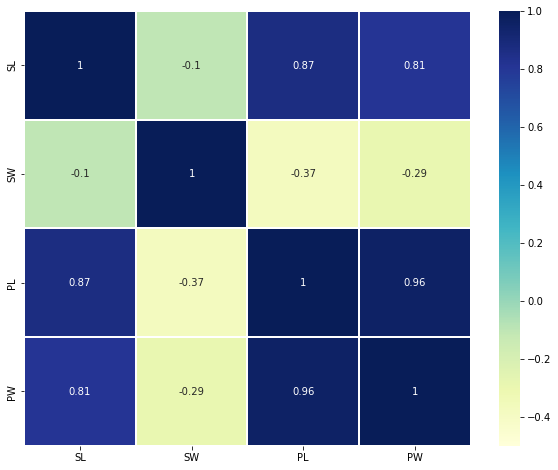

In [20]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.5,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

# ENCODING

In [21]:
#our target variable is multi-class,hence we label encode it
from sklearn.preprocessing import LabelEncoder
label_encode= LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]= label_encode.fit_transform(data[a[i]])

In [22]:
#seperate our data into dependent and independent variable
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [23]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# LOGISTIC REGRESSION

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42, test_size=0.25)

In [25]:
#checking whether the data is under fit
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
model= lr.fit(x_train,y_train)
y_trainpred= model.predict(x_train)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [27]:
accuracy_score(y_train,y_trainpred)

0.9907407407407407

In [28]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
model1= lr.fit(x_train,y_train)
y_pred1= model1.predict(x_test)

In [29]:
acc_lr= accuracy_score(y_test,y_pred1)*100
f1_lr= f1_score(y_test,y_pred1,average='micro')*100

In [30]:
print('Accuracy is',accuracy_score(y_test,y_pred1))
print('precision is',precision_score(y_test,y_pred1,average='micro'))
print('recall score is', recall_score(y_test,y_pred1,average='micro'))
print('f1 score is',f1_score(y_test,y_pred1,average='micro'))

Accuracy is 0.918918918918919
precision is 0.918918918918919
recall score is 0.918918918918919
f1 score is 0.918918918918919


In [31]:
confusion_matrix(y_test,y_pred1)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [33]:
acc_values

[0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919]

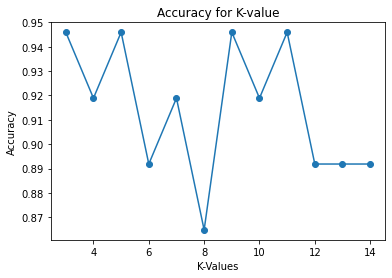

In [34]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [35]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='minkowski')
model2= classifier.fit(x_train,y_train)
y_pred2= model2.predict(x_test)

In [36]:
acc_KN= accuracy_score(y_test,y_pred2)*100
f1_KN= f1_score(y_test,y_pred2,average='micro')*100

In [37]:
print('Accuracy is',accuracy_score(y_test,y_pred2))
print('precision is',precision_score(y_test,y_pred2,average='micro'))
print('recall score is', recall_score(y_test,y_pred2,average='micro'))
print('f1 score is',f1_score(y_test,y_pred2,average='micro'))

Accuracy is 0.9459459459459459
precision is 0.9459459459459459
recall score is 0.9459459459459459
f1 score is 0.9459459459459459


In [38]:
confusion_matrix(y_test,y_pred2)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

# DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)
y_pred3= dt_model.predict(x_test)

In [40]:
acc_dt= accuracy_score(y_test,y_pred3)*100
f1_dt= f1_score(y_test,y_pred3,average='micro')*100

In [41]:
print('Accuracy is',accuracy_score(y_test,y_pred3))
print('precision is',precision_score(y_test,y_pred3,average='micro'))
print('recall score is', recall_score(y_test,y_pred3,average='micro'))
print('f1 score is',f1_score(y_test,y_pred3,average='micro'))

Accuracy is 0.8918918918918919
precision is 0.8918918918918919
recall score is 0.8918918918918919
f1 score is 0.8918918918918919


In [42]:
confusion_matrix(y_test,y_pred3)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

# SVM

In [43]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm_model= svm.fit(x_train,y_train)
y_pred4= svm_model.predict(x_test)

In [44]:

acc_svm= accuracy_score(y_test,y_pred4)*100
f1_svm= f1_score(y_test,y_pred4,average='micro')*100

In [45]:
print('Accuracy is',accuracy_score(y_test,y_pred4))
print('precision is',precision_score(y_test,y_pred4,average='micro'))
print('recall score is', recall_score(y_test,y_pred4,average='micro'))
print('f1 score is',f1_score(y_test,y_pred4,average='micro'))

Accuracy is 0.9459459459459459
precision is 0.9459459459459459
recall score is 0.9459459459459459
f1 score is 0.9459459459459459


In [46]:

confusion_matrix(y_test,y_pred4)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

# RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc=RandomForestClassifier()
random_model=rfc.fit(x_train,y_train)
y_pred5=random_model.predict(x_test)


In [49]:
acc_rf= accuracy_score(y_test,y_pred5)*100
f1_rf= f1_score(y_test,y_pred5,average='micro')*100

In [50]:
print('Accuracy is',accuracy_score(y_test,y_pred5))
print('precision is',precision_score(y_test,y_pred5,average='micro'))
print('recall score is', recall_score(y_test,y_pred5,average='micro'))
print('f1 score is',f1_score(y_test,y_pred5,average='micro'))

Accuracy is 0.9459459459459459
precision is 0.9459459459459459
recall score is 0.9459459459459459
f1 score is 0.9459459459459459


In [51]:
confusion_matrix(y_test,y_pred5)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [52]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'KNN',
              'Decision Tree',
              'Support Vector Machine',
              'Random Forest'],
    'f1-Score': [ f1_lr,
                      f1_KN, 
                      f1_dt,
                      f1_svm,
                      f1_rf],
    'Accuracy_score':[ acc_lr,
                      acc_KN, 
                      acc_dt,
                      acc_svm,
                      acc_rf]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df.reset_index(drop=True,inplace=True)
result_df.head(5)

,Model,f1-Score,Accuracy_score
0,KNN,94.594595,94.594595
1,Support Vector Machine,94.594595,94.594595
2,Random Forest,94.594595,94.594595
3,Logistic Regression,91.891892,91.891892
4,Decision Tree,89.189189,89.189189


 classification model which gives the best result to predict iris species is the Decision tree with 97% accuracy.